In [39]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [40]:
heartdf=pd.read_csv('heart_2020_cleaned.csv')

source: https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease

Key: 

Target --> HeartDisease (yes/no) - Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI)

BMI - Body Mass Index 
Smoking - Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes]
AlcoholDrinking - Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week
Stroke - Ever told) you had a stroke?
PhysicalHealth - Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? (0-30 days)
MentalHealth - Thinking about your mental health, for how many days during the past 30 days was your mental health not good? (0-30 days)
DiffWalking - Do you have serious difficulty walking or climbing stairs?
Sex - male/female
AgeCategory - Fourteen-level age category
Race - Imputed race/ethnicity value
Diabetic - Ever told you had diabetes?
PhysicalActivity - Adults who reported doing physical activity or exercise during the past 30 days other than their regular job
GenHealth - Would you say that in general your health is...
SleepTime - On average, how many hours of sleep do you get in a 24-hour period?
Asthma - Ever told you had asthma?
KidneyDisease - Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease?
SkinCancer - Ever told you had skin cancer?

In [41]:
heartdf.shape

(319795, 18)

In [42]:
heartdf.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [43]:
heartdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [44]:
heartdf.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [45]:
heartdf.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [46]:
heartdf.nunique()

HeartDisease           2
BMI                 3604
Smoking                2
AlcoholDrinking        2
Stroke                 2
PhysicalHealth        31
MentalHealth          31
DiffWalking            2
Sex                    2
AgeCategory           13
Race                   6
Diabetic               4
PhysicalActivity       2
GenHealth              5
SleepTime             24
Asthma                 2
KidneyDisease          2
SkinCancer             2
dtype: int64

In [47]:
heartdf.groupby(['Race']).size().sort_values()

Race
American Indian/Alaskan Native      5202
Asian                               8068
Other                              10928
Black                              22939
Hispanic                           27446
White                             245212
dtype: int64

In [48]:
def create_pie_chart(df, column):

    plt.figure(figsize=(3, 3))

    df[column].value_counts().plot(kind='pie',autopct='%1.1f%%', startangle=140)

    plt.title(f'Pie Chart {column}')

    plt.axis('equal')

    plt.show()

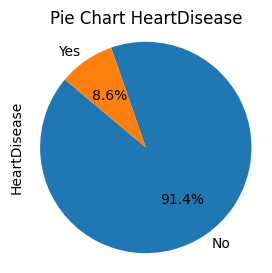

In [49]:
create_pie_chart(heartdf,'HeartDisease')

In [50]:
def plot_side_by_side(dataframe,columns, titles=None, figsize=(10, 5)):

    num_plots = len(columns)

    plt.figure(figsize=figsize)

    for i, col in enumerate(columns, 1):
        create_pie_chart(dataframe,col)

    plt.tight_layout()
    plt.show()

<Figure size 1000x500 with 0 Axes>

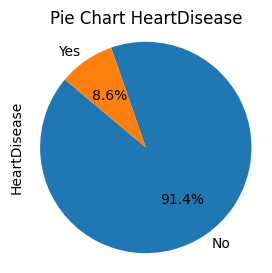

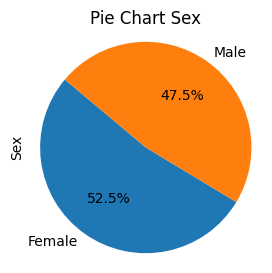

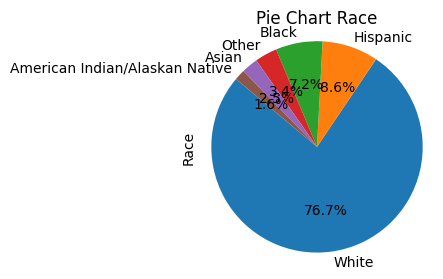

<Figure size 640x480 with 0 Axes>

In [51]:
plot_side_by_side(heartdf,['HeartDisease','Sex','Race'])

In [52]:
order_age=['18-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-64','65-69','70-74','75-79','80 or older']

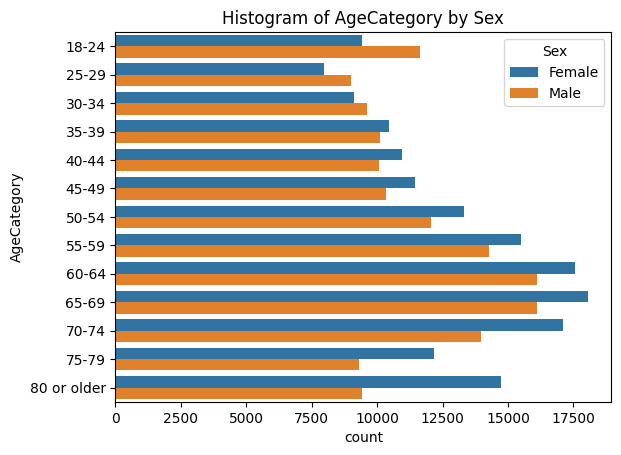

In [53]:
sns.countplot(data=heartdf,y='AgeCategory',hue='Sex',order=order_age)

plt.title('Histogram of AgeCategory by Sex')
plt.show()

In [54]:
heartdf_copy = heartdf.copy().replace('American Indian/Alaskan Native','Indian\nAlaskan Native')

In [55]:
def normalize_plot(df,col_x,col_hue, order_x=None):

    df1 = df.groupby(col_x)[col_hue].value_counts(normalize=True)
    df1 = df1.mul(100)
    df1 = df1.rename('percent').reset_index()

    g = sns.catplot(x=col_x,y='percent',hue=col_hue,kind='bar',data=df1, order=order_x)
    g.ax.set_ylim(0,100)

    for p in g.ax.patches:
        txt = str(p.get_height().round(2)) + '%'
        txt_x = p.get_x() 
        txt_y = p.get_height()
        g.ax.text(txt_x,txt_y,txt)

    g.set(title=f"Percentage of {col_x} by {col_hue}")

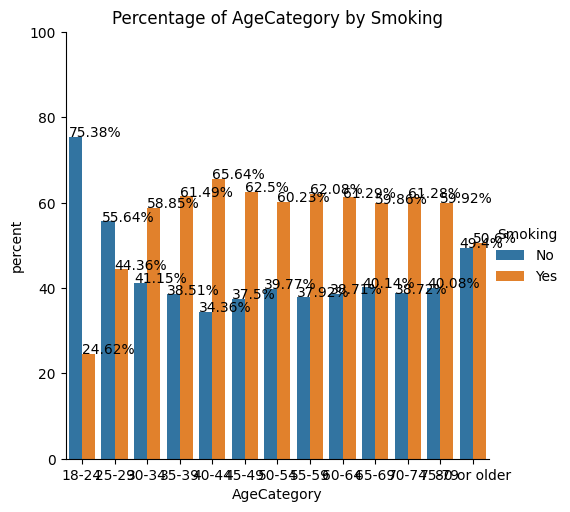

In [56]:
normalize_plot(heartdf_copy[heartdf_copy.HeartDisease=='Yes'],'AgeCategory','Smoking',order_age)

In [88]:
order_GenHealth = ['Poor','Fair','Good','Very good','Excellent']

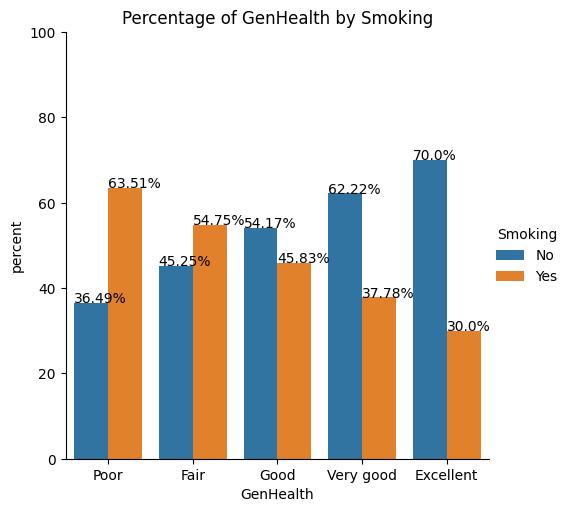

In [58]:
normalize_plot(heartdf_copy,'GenHealth','Smoking',order_GenHealth)

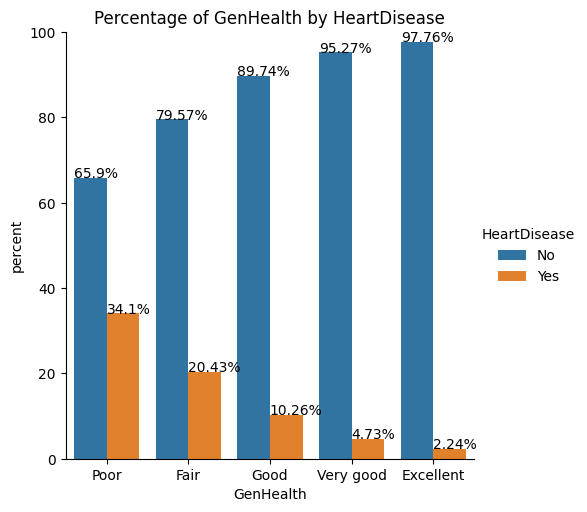

In [59]:
normalize_plot(heartdf_copy,'GenHealth','HeartDisease',order_GenHealth)

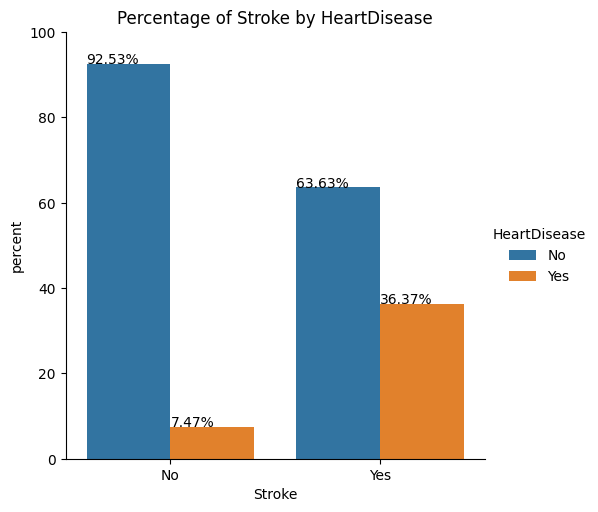

In [60]:
normalize_plot(heartdf_copy,'Stroke','HeartDisease')

<Axes: xlabel='SleepTime'>

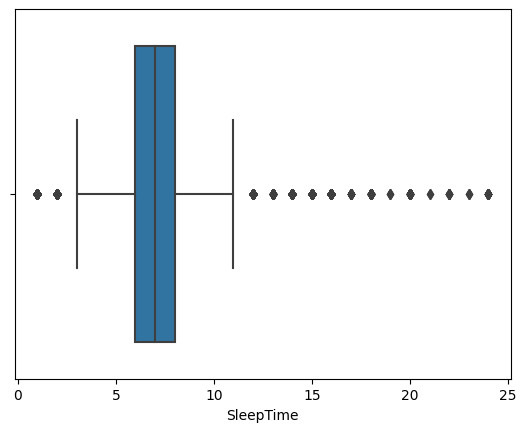

In [61]:
sns.boxplot(x='SleepTime', data=heartdf)

In [126]:
def graph_with_lines(byparam,param1,param2=None):

    plt.figure(figsize=(8,5))

    heartdf.groupby(byparam).size().plot(kind='bar')

    heartdf.groupby(byparam)[param1].mean().plot(kind='line', secondary_y=True, color='b', label=param1)
    
    if param2==None:
        None
    else:
        heartdf.groupby(byparam)[param2].mean().plot(kind='line', secondary_y=True, color='r', label=param2)

    plt.title(f'Parameters Average by {byparam}')
    plt.legend(loc="upper left")


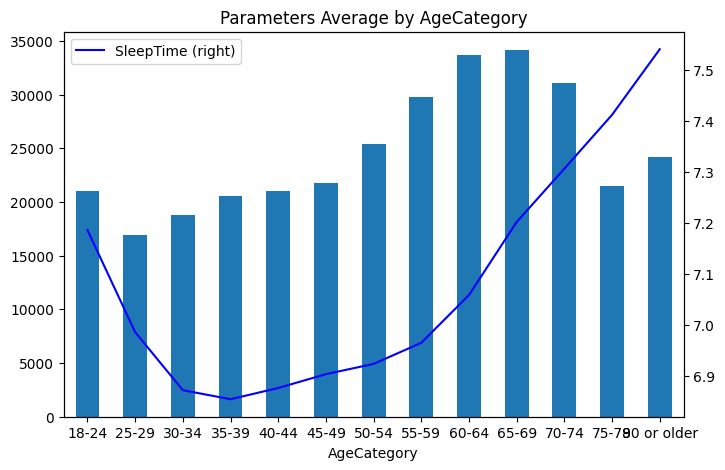

In [127]:
graph_with_lines('AgeCategory','SleepTime')

plt.xticks(ticks=range(len(order_age)), labels=order_age)
plt.show()

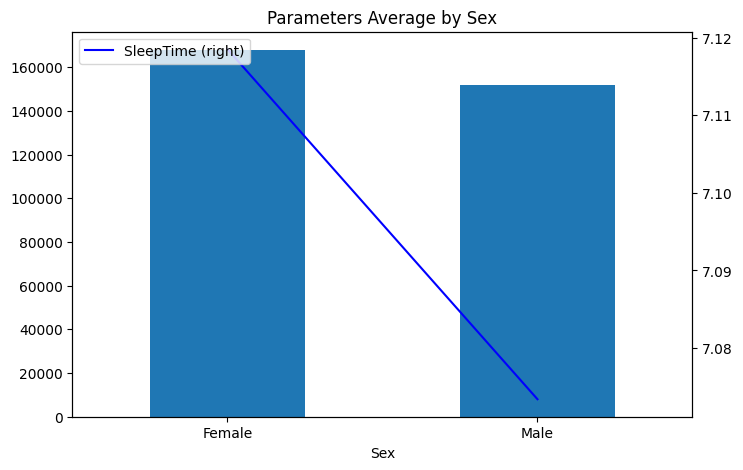

In [128]:
graph_with_lines('Sex','SleepTime')

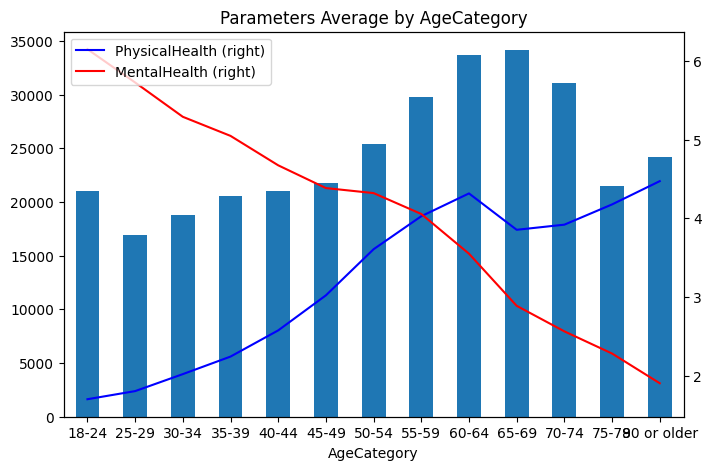

In [129]:
graph_with_lines('AgeCategory','PhysicalHealth','MentalHealth')

plt.xticks(ticks=range(len(order_age)), labels=order_age)

plt.show()


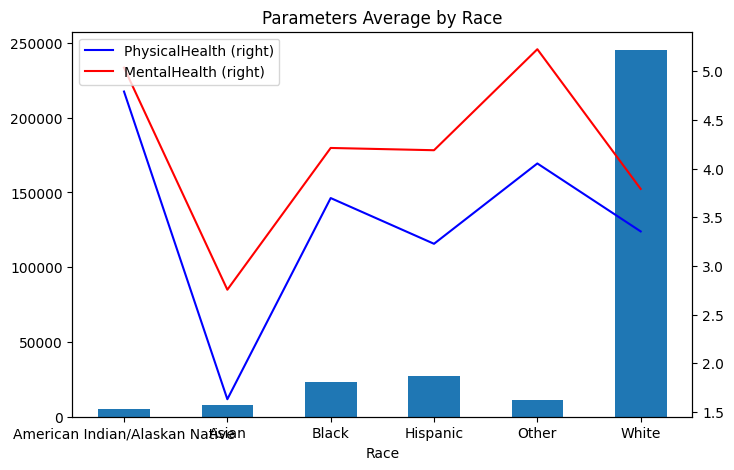

In [130]:
graph_with_lines('Race','PhysicalHealth','MentalHealth')

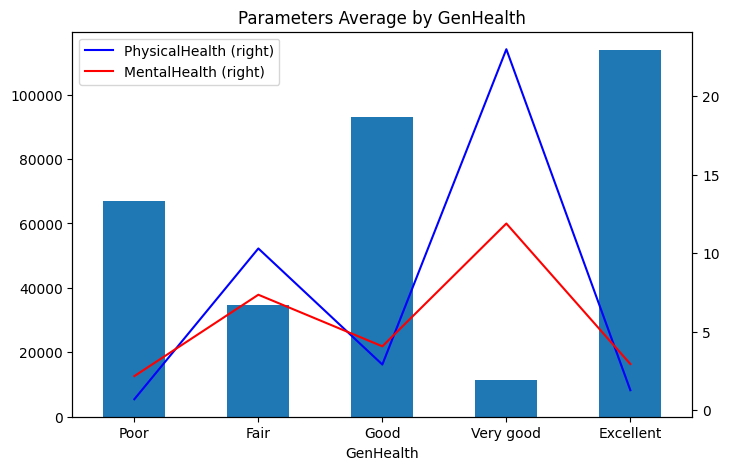

In [131]:
graph_with_lines('GenHealth','PhysicalHealth','MentalHealth')
plt.xticks(ticks=range(len(order_GenHealth)), labels=order_GenHealth)

plt.show()

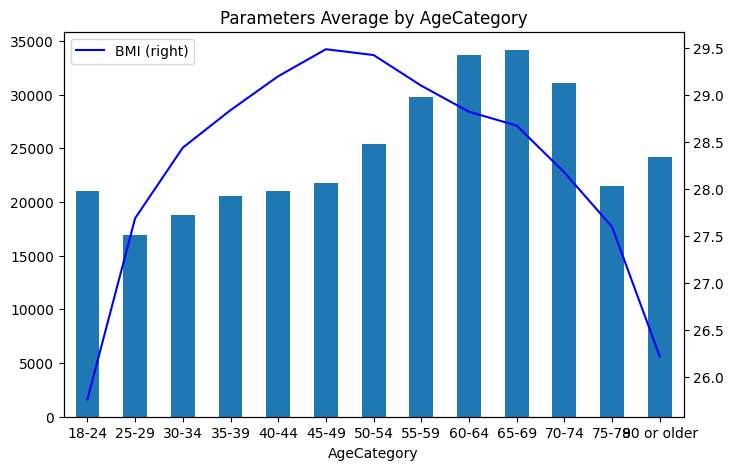

In [132]:
graph_with_lines('AgeCategory','BMI')

plt.xticks(ticks=range(len(order_age)), labels=order_age)
plt.show()

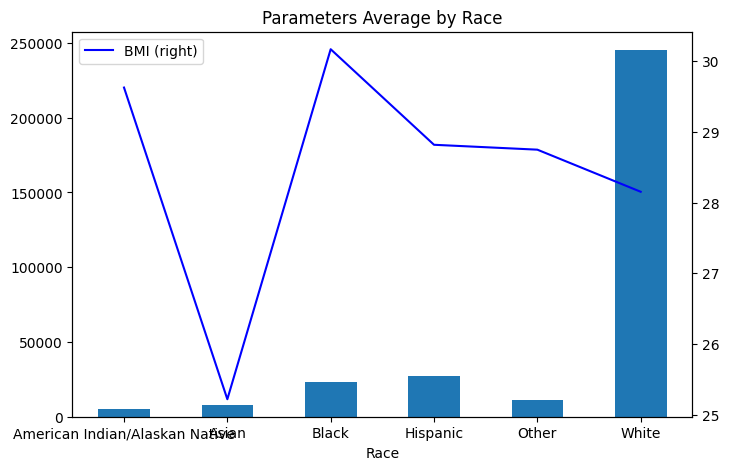

In [134]:
graph_with_lines('Race','BMI')

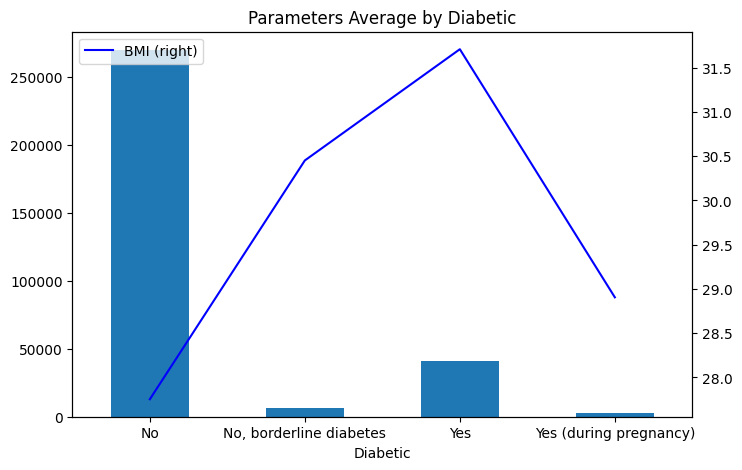

In [137]:
graph_with_lines('Diabetic','BMI')

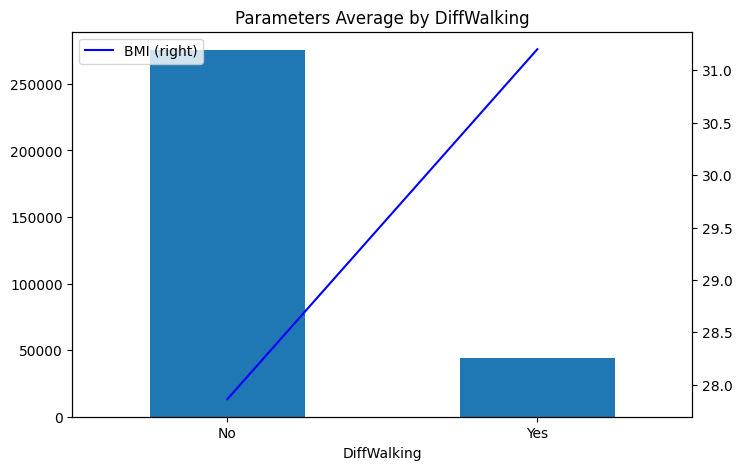

In [140]:
graph_with_lines('DiffWalking','BMI')

In [25]:
# אולי להחליף בצורה כזאת שיהיה יפה יותר
# heartdf.replace('American Indian/Alaskan Native','Indian\nAlaskan Native')